## Project Stage - II (Data Modeling)

## Goals

The goal of Stage II is to develop the data for modeling and comparative analysis. Here you will be comparing how US is doing with other countries in COVID cases and deaths. And you will be also analysing county based information for different states in the US. Since COVID dataset is huge, we will focus the analysis on selected dates, starts from 2020, July - 2020, December. 


### Tasks:

#### Task 1: (100 pts)
- Team: (50 pts) (Each question 10 pts, markdown 10 pts)
    - Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.  
    - Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data
        - Choose at least 5 similar populations countries to compare. 
    - Plot weekly trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases, and log normalized values. (hint: do normalization: number of cases per 100,000, and then use np.log10())
    - Identify the peak weeks of the cases and deaths in US and other countries. Try to do background research to see what the reasoning for the peaks can be (holidays, vacations, travel, weather, etc). Explain with a description in the notebooks. 
- Member: (50 pts) (Each question 10 pts, markdown 10 pts)
    - Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state". 
    - Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?
    - Identify five counties within a state of your choice with high cases and death rates. 
    - Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern. 
    

**Deliverable**
- Each member creates separate notebooks for member tasks (with your name). Upload all notebooks and reports to canvas.
- Presentation in class.

*PS: Try to use `Plotly` for your charts. Will be useful in Stage IV. As plotly graphs are intereactive they are not rendered properly in Github. You can use the approach here to render static images: https://plotly.com/python/static-image-export/. Submission to the repository should contain static images in the notebook.*

Clarification: (1) If the first date in July 2020 is not Monday, you can start analysis from the first Monday in July, and the end date should be the last Sunday in December, 2020. (2) Group members can have some overlap in choosing the states, since there is little chance that all members work on the same selected states.

 - Compare the weekly statistics (mean, median, mode) for number of cases and deaths across US.  

In [65]:
import pandas as pd
import datetime
import numpy as np




deaths = pd.read_csv("./covid_deaths_usafacts.csv")
cases = pd.read_csv("./covid_confirmed_usafacts.csv")
combined = pd.read_csv("./Full_Covid_Data.csv")

In [66]:
deaths

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,142,142,142
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
3190,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,43
3191,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51


In [89]:
def get_dates(data):
    dates = data.loc[:, [i not in ["countyFIPS","County Name", "State", "StateFIPS"] for i in data]] #Extract non dates
    
    dates.columns = pd.to_datetime(dates.columns) #Fix columns to be date times
    
    dates = dates.loc[:, [(i <= datetime.datetime(2020, 12, 27)) and (i >= datetime.datetime(2020, 7, 6)) for i in dates]] #Extract correct time
    return dates
death_dates = get_dates(deaths)
death_dates

,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,13,13,14,15,15,16,16,18,19,...,44,44,44,44,44,46,46,46,46,47
2,10,10,10,11,12,12,12,12,12,13,...,146,147,147,147,149,151,151,151,151,152
3,2,2,2,2,2,2,2,2,3,3,...,30,32,32,32,32,32,32,32,32,32
4,1,1,1,1,1,1,1,1,2,2,...,42,42,42,42,42,42,42,42,42,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,0,0,0,0,0,0,0,0,1,1,...,15,15,15,15,15,15,15,15,15,15
3189,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3190,0,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3191,5,5,5,5,5,5,5,5,5,5,...,11,11,11,11,11,11,11,11,11,11


In [82]:
def get_weekly_stats(dates): #Note: was written for deaths, but should work the same for infect

    weeks = [range(i, i + 7) for i in range(0, len(dates.columns), 7)]
    dates.iloc[:, weeks[0]]
    
    stats = pd.DataFrame({"week": [],"mean" : [], "median" : [], "mode" : []})
    
    for i in range(len(weeks)):
        date = dates.iloc[:, weeks[i]].iloc[0, :].keys()[0]
        #print(date)
        week = dates.iloc[:, weeks[i]].sum(axis = 1)
        #print(week)
        #print(week.mean())
        #print(week.median())
        #print(week.mode())
        #print(death_stats)
        new_row = pd.DataFrame({"week": date,"mean" : week.mean(), "median" : week.median(), "mode" : week.mode()})
        stats = pd.concat([stats, new_row])
    return stats
death_stats = get_weekly_stats(death_dates)

death_stats

,week,mean,median,mode
0,2020-07-06,295.095835,14.0,0.0
0,2020-07-13,308.733793,14.0,0.0
0,2020-07-20,324.098653,14.0,0.0
0,2020-07-27,340.565925,20.0,0.0
0,2020-08-03,357.106170,21.0,0.0
0,2020-08-10,373.161917,27.0,0.0
0,2020-08-17,387.721265,28.0,0.0
0,2020-08-24,401.271218,32.0,0.0
0,2020-08-31,413.722831,35.0,0.0
0,2020-09-07,424.243032,39.0,0.0


<Axes: xlabel='week'>

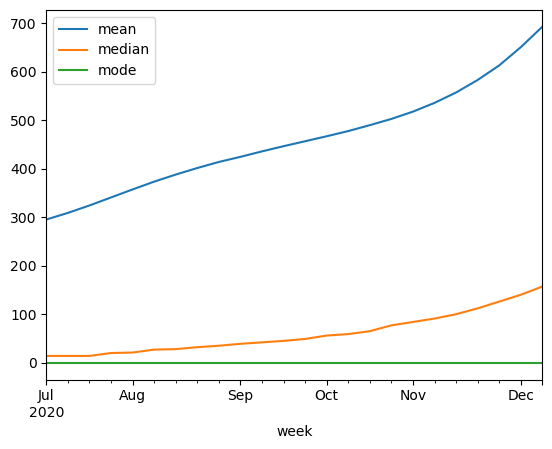

In [69]:
death_stats.plot(x = "week")

## Get mean, median, and mode of weakly mean, median, and mode

In [83]:
death_stats["mean"].mean()

471.1959285937989

In [84]:
death_stats["median"].median()

49.0

In [85]:
death_stats["mode"].mode()

0    0.0
Name: mode, dtype: float64

## Note that mode is allways 0 and mean is far larger than median

In [70]:
infection_dates = get_dates(cases)

infection_dates

,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,618,644,651,661,670,684,706,728,746,756,...,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029
2,911,997,1056,1131,1187,1224,1294,1359,1414,1518,...,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825
3,356,360,366,371,381,398,403,413,428,441,...,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406
4,197,199,201,211,218,224,228,231,236,242,...,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,113,122,124,126,128,136,138,150,156,157,...,2696,2702,2718,2762,2780,2820,2820,2820,2845,2854
3189,145,146,149,149,150,155,157,162,164,170,...,1990,1992,2002,2019,2033,2039,2039,2039,2080,2080
3190,190,190,192,198,200,201,202,205,208,208,...,1399,1406,1416,1446,1460,1475,1475,1475,1495,1497
3191,39,40,42,42,42,43,43,43,43,43,...,690,695,699,713,720,726,726,726,747,747


In [96]:
infection_stats = get_weekly_stats(infection_dates)
infection_stats

,week,mean,median,mode
0,2020-07-06,7004.789540,693.0,0.0
0,2020-07-13,8006.192296,850.0,0.0
0,2020-07-20,9012.041027,1037.0,0.0
0,2020-07-27,9956.800501,1224.0,0.0
0,2020-08-03,10796.655496,1417.0,0.0
0,2020-08-10,11548.264641,1605.0,0.0
0,2020-08-17,12208.251801,1794.0,0.0
0,2020-08-24,12825.450673,1957.0,0.0
0,2020-08-31,13435.312872,2149.0,0.0
0,2020-09-07,13976.595365,2328.0,0.0


<Axes: xlabel='week'>

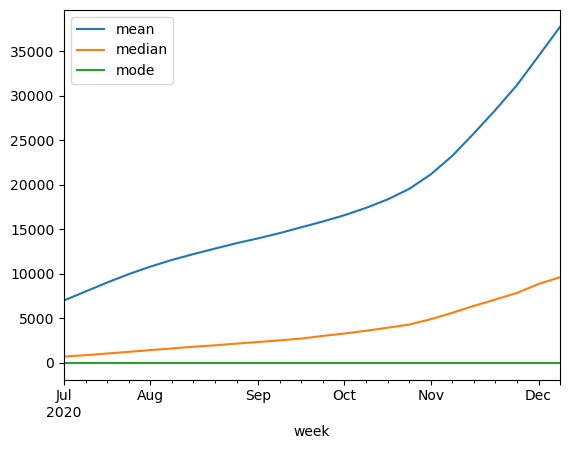

In [72]:
infection_stats.plot(x = "week")

In [90]:
infection_stats["mean"].mean()

17843.91425253158

In [91]:
infection_stats["median"].median()

2864.0

In [92]:
infection_stats["mode"].mode()

0    0.0
Name: mode, dtype: float64

## Note that mode is allways 0 and mean is far larger than median

# Compare the data against other countries of the world. Data at: https://ourworldindata.org/coronavirus-source-data

In [73]:
country_data = pd.read_csv("./Country_Data/owid-covid-data.csv")

country_data[country_data["location"] == "Russia"]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
275927,RUS,Europe,Russia,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275928,RUS,Europe,Russia,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275929,RUS,Europe,Russia,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275930,RUS,Europe,Russia,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
275931,RUS,Europe,Russia,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277414,RUS,Europe,Russia,2024-01-31,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
277415,RUS,Europe,Russia,2024-02-01,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
277416,RUS,Europe,Russia,2024-02-02,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN
277417,RUS,Europe,Russia,2024-02-03,23774451.0,0.0,105.857,401884.0,0.0,15.857,...,58.3,NaN,8.05,72.58,0.824,144713312.0,NaN,NaN,NaN,NaN


In [74]:
countries = ["JPN", "BRA", "DEU", "GRL", "CHN", "RUS"] #ISO codes of selected countries: Japan, Brazil, Greenland, China, and Russia 

In [75]:
def get_country_data(iso : str):
    data = country_data[country_data["iso_code"] == iso] #Restrict to country
    data["date"] = pd.to_datetime(data.loc[:,"date"])
    date_mask = [(data["date"] <= datetime.datetime(2020, 12, 27)), (data["date"] > datetime.datetime(2020, 7, 6))]
    date_mask_final = date_mask[0] & date_mask[1]

    data = data[date_mask_final]
    
    mean_cases = data["new_cases"].mean()
    median_cases = data["new_cases"].median()
    mode_cases = data["new_cases"].mode()
    
    mean_deaths = data["new_deaths"].mean()
    median_deaths = data["new_deaths"].median()
    mode_deaths = data["new_deaths"].mode()
    return mean_cases, median_cases, mode_cases, mean_deaths, median_deaths, mode_deaths

get_country_data("JPN")

C:\Users\Nivek\AppData\Local\Temp\ipykernel_17748\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])


(1136.7241379310344,
 0.0,
 0    0.0
 Name: new_cases, dtype: float64,
 12.850574712643677,
 0.0,
 0    0.0
 Name: new_deaths, dtype: float64)

In [76]:
for i in countries:
    print("%s data"%i)
    print('''
    mean_cases = %s
    median_cases = %s
    mode_cases = %s
    
    mean_deaths = %s
    median_deaths = %s
    mode_deaths = %s
    __________________________________________
    '''%get_country_data(i))

C:\Users\Nivek\AppData\Local\Temp\ipykernel_17748\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])
C:\Users\Nivek\AppData\Local\Temp\ipykernel_17748\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])
C:\Users\Nivek\AppData\Local\Temp\ipykernel_17748\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

JPN data

    mean_cases = 1136.7241379310344
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 12.850574712643677
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
BRA data

    mean_cases = 33962.52298850575
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 731.6896551724138
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
DEU data

    mean_cases = 8410.022988505747
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 216.70114942528735
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
GRL data


C:\Users\Nivek\AppData\Local\Temp\ipykernel_17748\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])



    mean_cases = 0.07471264367816093
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 0.0
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
CHN data

    mean_cases = 63.32183908045977
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 0.7413793103448276
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    
RUS data

    mean_cases = 13614.925287356322
    median_cases = 0.0
    mode_cases = 0    0.0
Name: new_cases, dtype: float64
    
    mean_deaths = 256.41954022988506
    median_deaths = 0.0
    mode_deaths = 0    0.0
Name: new_deaths, dtype: float64
    __________________________________________
    


C:\Users\Nivek\AppData\Local\Temp\ipykernel_17748\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])
C:\Users\Nivek\AppData\Local\Temp\ipykernel_17748\1978319721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data.loc[:,"date"])


## For some reason all median values are 0. I expect that to be reporting error.

# Plot weekly trends (cases and deaths) of US and compare other countries. Utilize aggregrate, normalized by population, difference in cases, and log normalized values. (hint: do normalization: number of cases per 100,000, and then use np.log10())

In [77]:
us_data = combined

us_population = sum(us_data["population"])

us_population

328239523

<Axes: >

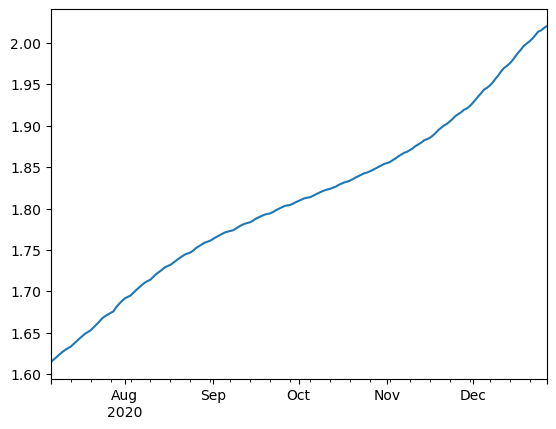

In [78]:
norm_death_dates = (death_dates/(us_population/100000)).sum()
norm_death_dates += 1 # To prevent values of -infinity
norm_death_dates = norm_death_dates.agg(np.log10)

norm_death_dates.plot()

<Axes: >

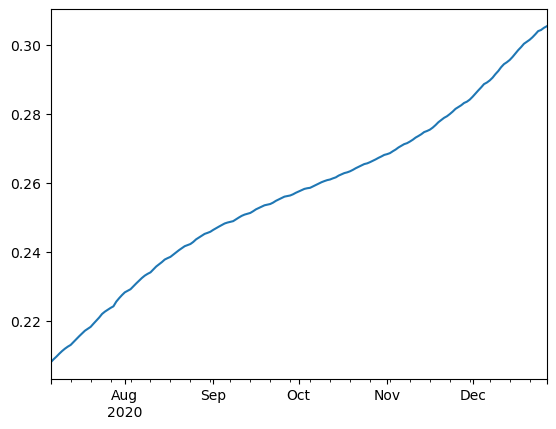

In [79]:
norm_infection_dates = (infection_dates/(us_population/100000))
norm_infection_dates += 1 # To prevent values of -infinity
norm_infection_dates = norm_death_dates.agg(np.log10)

norm_infection_dates.plot()

## Get data from other countries

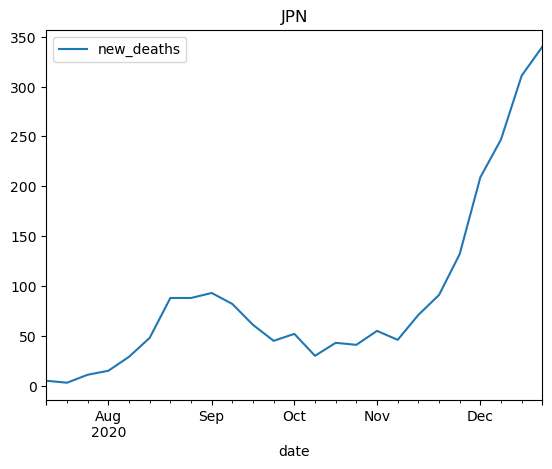

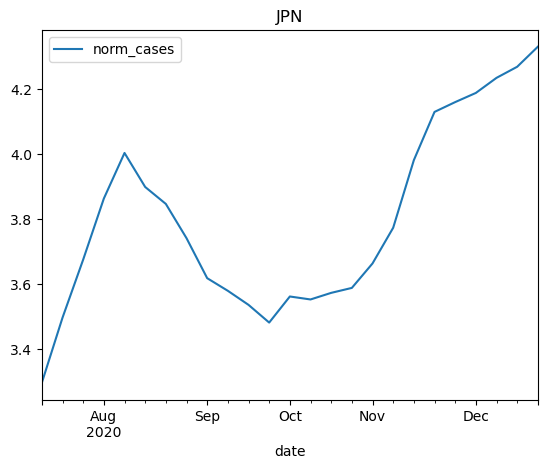

In [97]:
def plot_country(iso : str):
    data = country_data[country_data["iso_code"] == iso].copy() #Restrict to country
    data["date"] = pd.to_datetime(data.loc[:,"date"])
    date_mask = [(data["date"] <= datetime.datetime(2020, 12, 27)), (data["date"] > datetime.datetime(2020, 7, 6))]
    date_mask_final = date_mask[0] & date_mask[1]
    
    data = data[date_mask_final]
    #Remove zeros
    
    '''norm_death_dates = (death_dates/(us_population/100000)).sum()
    norm_death_dates += 1 # To prevent values of -infinity
    norm_death_dates = norm_death_dates.agg(np.log10)'''
    
     
    
    
    data = data[data["new_cases"] != 0]
    
    data["new_cases"] += 1
    data["norm_cases"] = data["new_cases"].apply(np.log10)
    
    data.plot(x = "date", y = "new_deaths", title = iso)
    data.plot(x = "date", y = "norm_cases", title = iso)


plot_country("JPN")

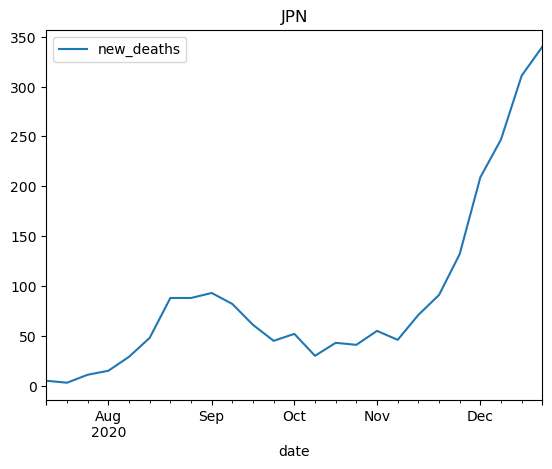

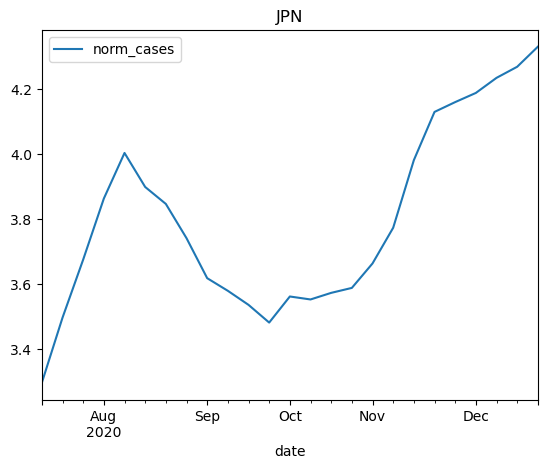

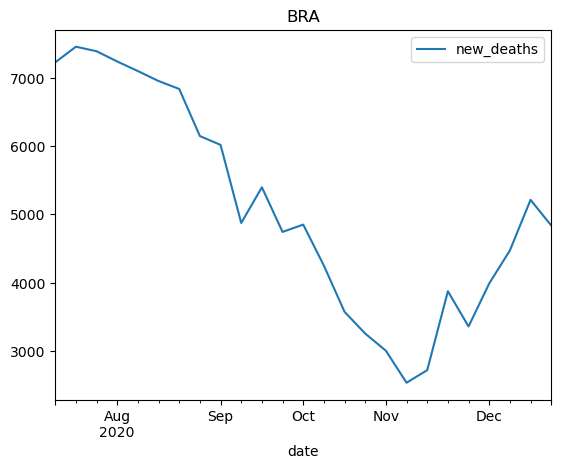

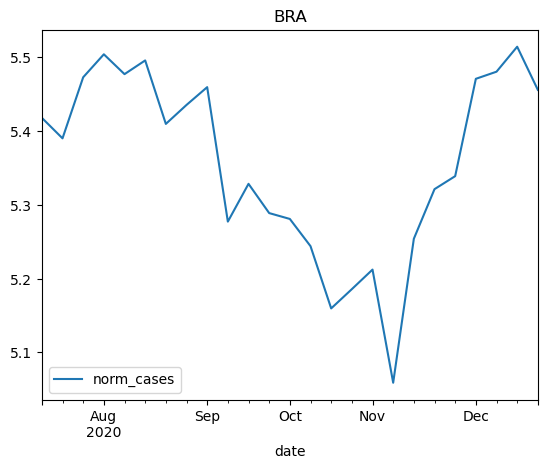

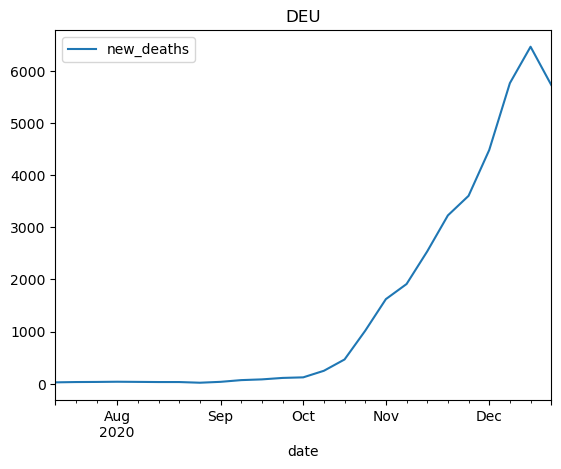

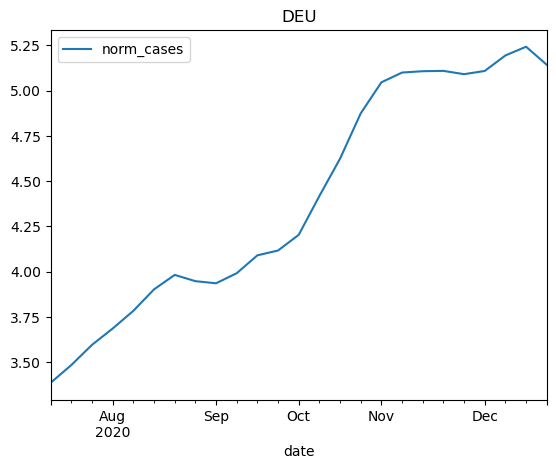

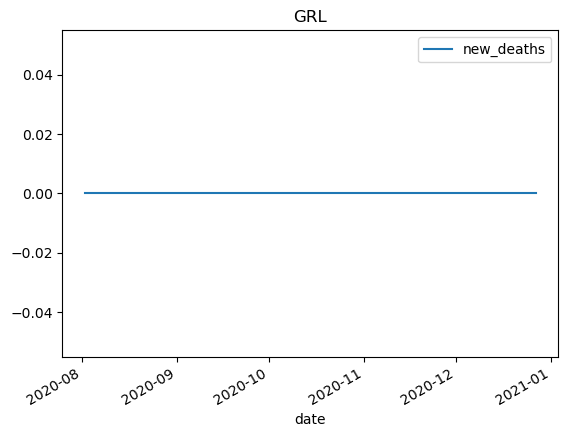

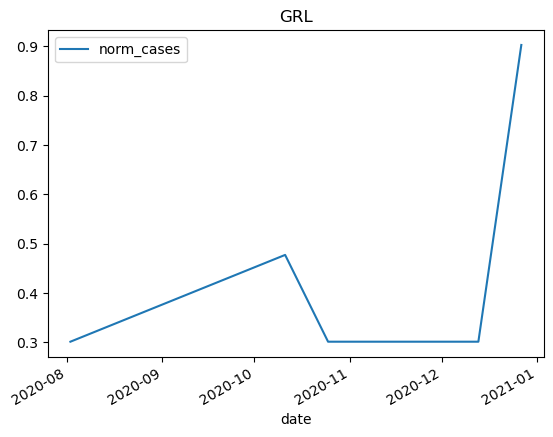

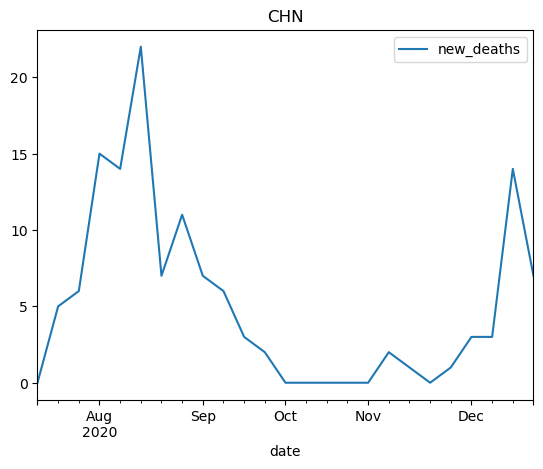

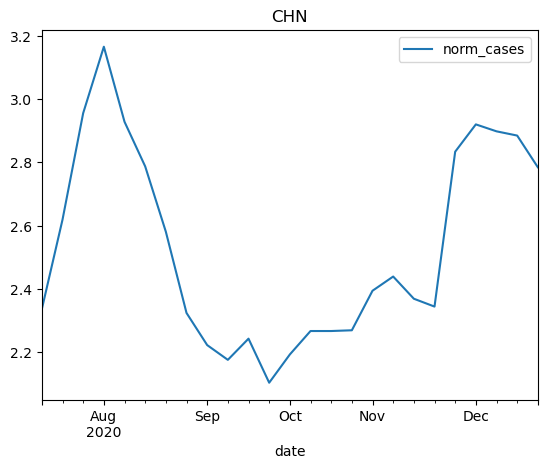

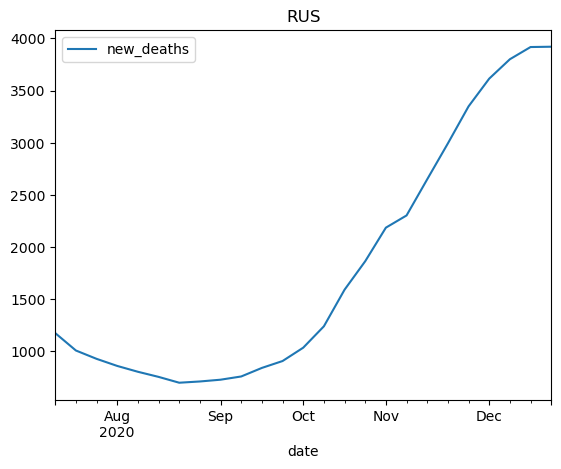

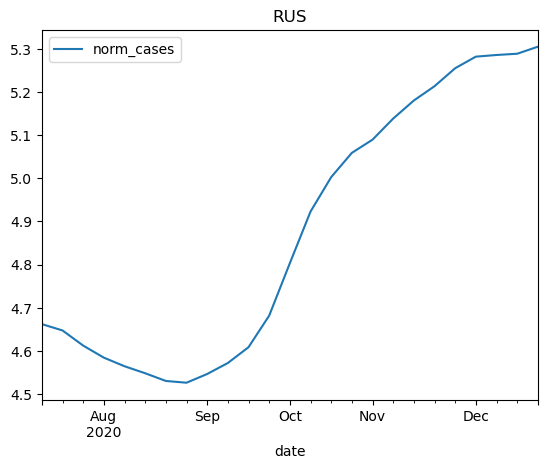

In [98]:
for i in countries:
    plot_country(i)

### NOTE: Greenland has reported no deaths